# Equilibrium Data Analysis

As a baseline, see how well the equilibrium model predicts observed outcomes.

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [2]:
data = pd.read_pickle("FullData.pickle")

In [3]:
len(data)

1610478

In [3]:
data.head()

,ccode1,ccode2,year,euwtT1v2,wrTu1v1,wrTu1v2,wrTu1vsq,wrTp1win,wrTstk1,wrTu1sq,...,cwongo,cwongonm,cwinit,cwinitnm,cwdynm,cwhost1,cwhost2,cwkeynum,cwhiact1,cwhiact2
0,2,200,1816,-1.776549,1.131174,-1.450832,-0.238012,0.048503,2.582006,-0.238012,...,0,0,0,0,0,0,0,0,0,0
1,2,210,1816,-1.130330,1.025024,-1.368436,-0.238012,0.107475,2.393460,-0.238012,...,0,0,0,0,0,0,0,0,0,0
2,2,220,1816,-2.420352,0.925198,-1.288975,-0.238012,0.071763,2.214174,-0.238012,...,0,0,0,0,0,0,0,0,0,0
3,2,225,1816,-0.156504,0.899530,-1.268245,-0.238012,0.118632,2.167775,-0.238012,...,0,0,0,0,0,0,0,0,0,0
4,2,230,1816,-1.166779,1.025024,-1.368436,-0.238012,0.111646,2.393460,-0.238012,...,0,0,1,3239,323901,4,1,3239,16,0


In [4]:
data.columns

Index(['ccode1', 'ccode2', 'year', 'euwtT1v2', 'wrTu1v1', 'wrTu1v2',
       'wrTu1vsq', 'wrTp1win', 'wrTstk1', 'wrTu1sq', 'wrTu1ac1', 'wrTu1ac2',
       'wrTu1neg', 'wrTu1cp1', 'wrTu1cp2', 'wrTu1wr1', 'wrTu1wr2', 'wrTu2v2',
       'wrTu2v1', 'wrTu2vsq', 'wrTp2win', 'wrTstk2', 'wrTu2sq', 'wrTu2ac2',
       'wrTu2ac1', 'wrTu2neg', 'wrTu2cp2', 'wrTu2cp1', 'wrTu2wr2', 'wrTu2wr1',
       'eqTsq', 'eqTnego', 'eqTacqa', 'eqTacqb', 'eqTcapa', 'eqTcapb',
       'eqTwara', 'eqTwarb', 'cwongo', 'cwongonm', 'cwinit', 'cwinitnm',
       'cwdynm', 'cwhost1', 'cwhost2', 'cwkeynum', 'cwhiact1', 'cwhiact2'],
      dtype='object')

In [5]:
# The Game-Theoretic Equilibrium
equilibrium_cols = ['eqTsq', 'eqTnego', 'eqTacqa', 'eqTacqb', 'eqTcapa', 'eqTcapb', 
                'eqTwara', 'eqTwarb']

data["Equilibrium"] = ""
for col in equilibrium_cols:
    data.loc[data[col] == 1, "Equilibrium"] = col

# Cutting out missing data
data = data[data.Equilibrium!=""]

In [6]:
# Observed outcomes
data["Outcome"] = ""

data.loc[((data.cwhost1<2) & (data.cwhost2<2)), "Outcome"] = "StatusQuo"
data.loc[((data.cwhost1>3) & (data.cwhost2>3)), "Outcome"] = "War"
data.loc[((data.cwhost1==data.cwhost2) & (data.cwhost1>1) & 
          (data.cwhost1<4)), "Outcome"] = "Negotiation"
data.loc[((data.cwhost1>data.cwhost2) & (data.cwhost1>1) & 
          (data.cwhost1<4)), "Outcome"] = "Acquiesce_B"
data.loc[((data.cwhost1<data.cwhost2) & (data.cwhost2>1) & 
          (data.cwhost2<4)), "Outcome"] = "Acquiesce_A"
data.loc[((data.cwhost1>data.cwhost2) & (data.cwhost1>3)), "Outcome"] = "Capitulate_B"
data.loc[((data.cwhost1<data.cwhost2) & (data.cwhost2>3)), "Outcome"] = "Capitulate_A"

## How often is the equilibrium observed?

In [15]:
data.Equilibrium.replace(['eqTacqa', 'eqTwara', 'eqTsq', 'eqTnego', 'eqTacqb', 'eqTwarb'],
                    ["Acquiesce_A", "War_A", "StatusQuo", "Negotiation", "Acquiesce_B", "War_B"], 
                        inplace=True)

In [13]:
data["Eq_Observed"] = 0
data.loc[(data.Equilibrium == data.Outcome), "Eq_Observed"] = 1
data.loc[((data.Equilibrium == "War_A") & (data.Outcome=="War")), "Eq_Observed"] = 1
data.loc[((data.Equilibrium == "War_B") & (data.Outcome=="War")), "Eq_Observed"] = 1

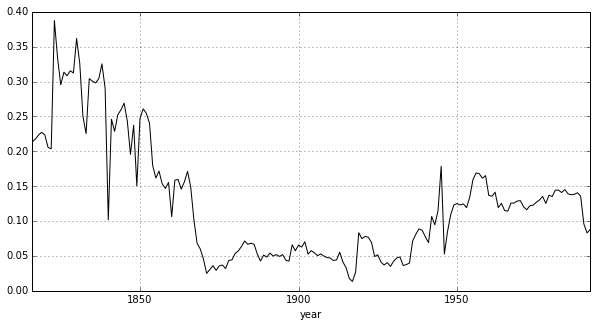

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
eq_obs_by_year = data.groupby("year")["Eq_Observed"].aggregate("mean")
eq_obs_by_year.plot(c='k', ax=ax)
ax.grid(True)

In [44]:
data.Eq_Observed.mean()

0.12675060806519078

So not very often.

In [16]:
pd.crosstab(data.Equilibrium, data.Outcome)

Outcome,Acquiesce_A,Acquiesce_B,Capitulate_A,Capitulate_B,Negotiation,StatusQuo,War
Equilibrium,,,,,,,
Acquiesce_A,91,35,94,118,22,90541,316
Acquiesce_B,31,85,174,173,45,108209,307
Negotiation,269,311,768,758,184,515886,2049
StatusQuo,70,73,180,261,75,123020,580
War_A,83,61,171,231,48,181566,503
War_B,0,1,1,1,2,296,3


## Equilibrium as predictor

### separate regressions

In [13]:
observed_outcomes = pd.get_dummies(data.Outcome)
equilibria = pd.get_dummies(data.Equilibrium)
equilibria["Const."] = 1
regressors = [col for col in equilibria.columns if col != "StatusQuo"]

In [14]:
len(observed_outcomes)

1027692

In [30]:
full_logits = {}
for col in observed_outcomes.columns:
    print(col)
    full_logits[col] = sm.Logit(observed_outcomes[col], equilibria[regressors])\
        .fit(method='powell')

Acquiesce_A
Optimization terminated successfully.
         Current function value: 0.004499
         Iterations: 9
         Function evaluations: 732
Acquiesce_B
Optimization terminated successfully.
         Current function value: 0.004666
         Iterations: 10
         Function evaluations: 758
Capitulate_A
Optimization terminated successfully.
         Current function value: 0.010251
         Iterations: 10
         Function evaluations: 745
Capitulate_B
Optimization terminated successfully.
         Current function value: 0.011237
         Iterations: 8
         Function evaluations: 596
Negotiation
Optimization terminated successfully.
         Current function value: 0.003244
         Iterations: 8
         Function evaluations: 624
StatusQuo
Optimization terminated successfully.
         Current function value: 0.046284
         Iterations: 6
         Function evaluations: 435
War
Optimization terminated successfully.
         Current function value: 0.024113
         Itera

In [32]:
results = summary_col(list(full_logits.values()), float_format="%0.2f", stars=True)

/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

In [33]:
print(results)


            Capitulate_B Negotiation  Acquiesce_A   Acquiesce_B Capitulate_A   War    StatusQuo
-----------------------------------------------------------------------------------------------
Acquiesce_A -0.49***     -0.95***    0.53***        -0.42**     -0.34***     -0.30*** 0.30***  
            (0.11)       (0.24)      (0.16)         (0.21)      (0.13)       (0.07)   (0.05)   
Acquiesce_B -0.29***     -0.41**     -0.72***       0.28*       0.10         -0.51*** 0.29***  
            (0.10)       (0.19)      (0.22)         (0.16)      (0.11)       (0.07)   (0.05)   
Negotiation -0.37***     -0.55***    -0.11          0.02        0.02         -0.17*** 0.18***  
            (0.07)       (0.14)      (0.13)         (0.13)      (0.08)       (0.05)   (0.03)   
War_A       -0.51***     -0.84***    -0.24          -0.56***    -0.44***     -0.53*** 0.51***  
            (0.09)       (0.18)      (0.16)         (0.17)      (0.11)       (0.06)   (0.04)   
War_B       0.45         2.38***     -3

In [12]:
#mnlogit = sm.MNLogit(data.Outcome, equilibria[regressors]).fit(maxiter=120, method='powell')

Optimization terminated successfully.
         Current function value: 0.057995
         Iterations: 6
         Function evaluations: 2915


In [13]:
print(mnlogit.summary())

                          MNLogit Regression Results                          
Dep. Variable:                Outcome   No. Observations:              1027692
Model:                        MNLogit   Df Residuals:                  1027656
Method:                           MLE   Df Model:                           30
Date:                Sat, 09 Jan 2016   Pseudo R-squ.:                0.002516
Time:                        17:45:04   Log-Likelihood:                -59601.
converged:                       True   LL-Null:                       -59752.
                                        LLR p-value:                 1.962e-46
 Outcome=Acquiesce_B       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
eqTacqa                 -0.6347        nan        nan        nan           nan       nan
eqTacqb                  0.6121        nan        nan        nan           nan       nan
eqTnego     

### Post-1850 only, to match burn-in period from models

In [36]:
data_full = data.copy()

In [17]:
#data = data[data.year>1971]
data = data[data.year>1850]

In [19]:
observed_outcomes = pd.get_dummies(data.Outcome)
equilibria = pd.get_dummies(data.Equilibrium)
equilibria["Const."] = 1
regressors = [col for col in equilibria.columns if col != "StatusQuo"]

In [24]:
full_logits = {}
for col in observed_outcomes.columns:
    print(col)
    full_logits[col] = sm.Logit(observed_outcomes[col], equilibria[regressors])\
        .fit(method='powell')

Acquiesce_A
Optimization terminated successfully.
         Current function value: 0.004356
         Iterations: 9
         Function evaluations: 727
Acquiesce_B
Optimization terminated successfully.
         Current function value: 0.004518
         Iterations: 10
         Function evaluations: 760
Capitulate_A
Optimization terminated successfully.
         Current function value: 0.010166
         Iterations: 6
         Function evaluations: 457
Capitulate_B
Optimization terminated successfully.
         Current function value: 0.011165
         Iterations: 6
         Function evaluations: 451
Negotiation
Optimization terminated successfully.
         Current function value: 0.003260
         Iterations: 9
         Function evaluations: 697
StatusQuo
Optimization terminated successfully.
         Current function value: 0.046022
         Iterations: 6
         Function evaluations: 434
War
Optimization terminated successfully.
         Current function value: 0.024147
         Iterat

In [25]:
results = summary_col(list(full_logits.values()), float_format="%0.2f", stars=True)

/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

In [26]:
print(results)


            Negotiation Capitulate_B Acquiesce_B StatusQuo Acquiesce_A   War    Capitulate_A
--------------------------------------------------------------------------------------------
Acquiesce_A -0.92***    -0.54***     -0.45**     0.34***   0.54***     -0.34*** -0.40***    
            (0.24)      (0.12)       (0.22)      (0.05)    (0.17)      (0.07)   (0.13)      
Acquiesce_B -0.41**     -0.29***     0.34**      0.31***   -0.73***    -0.54*** 0.08        
            (0.19)      (0.10)       (0.17)      (0.05)    (0.23)      (0.07)   (0.11)      
Negotiation -0.56***    -0.38***     0.06        0.20***   -0.08       -0.20*** 0.01        
            (0.14)      (0.07)       (0.14)      (0.03)    (0.14)      (0.05)   (0.08)      
War_A       -0.86***    -0.52***     -0.52***    0.53***   -0.19       -0.57*** -0.48***    
            (0.19)      (0.09)       (0.18)      (0.04)    (0.17)      (0.06)   (0.11)      
War_B       2.36***     0.44         1.79*       -0.98***  -24.50    

In [27]:
len(data)

997570

### Recode War to match model regressions

In [29]:
data.Equilibrium.replace({"War_A": "War", "War_B": "War"}, inplace=True)

In [30]:
observed_outcomes = pd.get_dummies(data.Outcome)
equilibria = pd.get_dummies(data.Equilibrium)
equilibria["Const."] = 1
regressors = [col for col in equilibria.columns if col != "StatusQuo"]

In [31]:
full_logits = {}
for col in observed_outcomes.columns:
    print(col)
    full_logits[col] = sm.Logit(observed_outcomes[col], equilibria[regressors])\
        .fit(method='powell')

Acquiesce_A
Optimization terminated successfully.
         Current function value: 0.004356
         Iterations: 9
         Function evaluations: 582
Acquiesce_B
Optimization terminated successfully.
         Current function value: 0.004520
         Iterations: 10
         Function evaluations: 643
Capitulate_A
Optimization terminated successfully.
         Current function value: 0.010167
         Iterations: 6
         Function evaluations: 384
Capitulate_B
Optimization terminated successfully.
         Current function value: 0.011165
         Iterations: 6
         Function evaluations: 378
Negotiation
Optimization terminated successfully.
         Current function value: 0.003264
         Iterations: 9
         Function evaluations: 589
StatusQuo
Optimization terminated successfully.
         Current function value: 0.046028
         Iterations: 6
         Function evaluations: 366
War
Optimization terminated successfully.
         Current function value: 0.024149
         Iterat

In [32]:
results = summary_col(list(full_logits.values()), float_format="%0.2f", stars=True)

/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

In [33]:
print(results)


            Negotiation Capitulate_B Acquiesce_B StatusQuo Acquiesce_A   War    Capitulate_A
--------------------------------------------------------------------------------------------
Acquiesce_A -0.93***    -0.54***     -0.44**     0.34***   0.54***     -0.34*** -0.40***    
            (0.24)      (0.12)       (0.22)      (0.05)    (0.17)      (0.07)   (0.13)      
Acquiesce_B -0.41**     -0.29***     0.34**      0.31***   -0.73***    -0.54*** 0.08        
            (0.19)      (0.10)       (0.17)      (0.05)    (0.23)      (0.07)   (0.11)      
Negotiation -0.57***    -0.38***     0.06        0.20***   -0.08       -0.20*** 0.01        
            (0.14)      (0.07)       (0.14)      (0.03)    (0.14)      (0.05)   (0.08)      
War         -0.82***    -0.52***     -0.51***    0.53***   -0.19       -0.56*** -0.48***    
            (0.18)      (0.09)       (0.18)      (0.04)    (0.17)      (0.06)   (0.11)      
Const.      -7.38***    -6.16***     -7.51***    4.59***   -7.51***  